<a href="https://colab.research.google.com/github/D1emonk/My-repo/blob/dev/Lesson_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
# Подготовка данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainloader10 = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform),
    batch_size=64, shuffle=True)

trainloader100 = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform),
    batch_size=64, shuffle=True)

testloader100 = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform),
    batch_size=64, shuffle=False)

In [8]:
# Определение модели
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [10]:
# Обучение на CIFAR-10
print("Обучение на CIFAR-10")
model = CNN(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    running_loss = 0.0
    model.train()
    for inputs, labels in trainloader10:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        loss = criterion(model(inputs), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Эпоха {epoch+1}, Потеря: {running_loss / len(trainloader10):.4f}")

Обучение на CIFAR-10
Эпоха 1, Потеря: 1.3586
Эпоха 2, Потеря: 0.9798
Эпоха 3, Потеря: 0.8186
Эпоха 4, Потеря: 0.7082
Эпоха 5, Потеря: 0.6109
Эпоха 6, Потеря: 0.5214
Эпоха 7, Потеря: 0.4467
Эпоха 8, Потеря: 0.3817
Эпоха 9, Потеря: 0.3228
Эпоха 10, Потеря: 0.2788


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import os

In [16]:
# Путь на Google Диске
save_dir = "/content/drive/MyDrive/models"
os.makedirs(save_dir, exist_ok=True)
# Полный путь к файлу
save_path = os.path.join(save_dir, "model_cifar10.pth")
# Сохранение модели
torch.save(model.state_dict(), save_path)

In [18]:
# Замена выходного слоя
model.fc2 = nn.Linear(256, 100).to(device)

In [19]:
 # Заморозка слоев
for param in model.parameters():
    param.requires_grad = False
for param in model.fc2.parameters():
    param.requires_grad = True

In [26]:
# Новый оптимизатор для дообучения
optimizer = optim.Adam(
    list(model.fc1.parameters()) + list(model.fc2.parameters()), lr=0.001
)

In [28]:
# Разморозка часть сверточных слоёв
for name, param in model.named_parameters():
    if 'conv2' in name or 'fc' in name:
        param.requires_grad = True

In [29]:
# Дообучение только последнего слоя на CIFAR-100
print("Дообучение на CIFAR-100")
for epoch in range(30):
    running_loss = 0.0
    model.train()
    for inputs, labels in trainloader100:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        loss = criterion(model(inputs), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Эпоха {epoch+1}, Потеря: {running_loss / len(trainloader100):.4f}")

Дообучение на CIFAR-100
Эпоха 1, Потеря: 2.9397
Эпоха 2, Потеря: 2.4668
Эпоха 3, Потеря: 2.1921
Эпоха 4, Потеря: 1.9697
Эпоха 5, Потеря: 1.7898
Эпоха 6, Потеря: 1.6205
Эпоха 7, Потеря: 1.4782
Эпоха 8, Потеря: 1.3636
Эпоха 9, Потеря: 1.2439
Эпоха 10, Потеря: 1.1408
Эпоха 11, Потеря: 1.0524
Эпоха 12, Потеря: 0.9731
Эпоха 13, Потеря: 0.8946
Эпоха 14, Потеря: 0.8329
Эпоха 15, Потеря: 0.7715
Эпоха 16, Потеря: 0.7124
Эпоха 17, Потеря: 0.6740
Эпоха 18, Потеря: 0.6434
Эпоха 19, Потеря: 0.6099
Эпоха 20, Потеря: 0.5691
Эпоха 21, Потеря: 0.5339
Эпоха 22, Потеря: 0.5145
Эпоха 23, Потеря: 0.4905
Эпоха 24, Потеря: 0.4753
Эпоха 25, Потеря: 0.4536
Эпоха 26, Потеря: 0.4353
Эпоха 27, Потеря: 0.4122
Эпоха 28, Потеря: 0.4066
Эпоха 29, Потеря: 0.3860
Эпоха 30, Потеря: 0.3759


In [30]:
# Сохраняем state_dict (веса модели)
torch.save(model.state_dict(), "/content/drive/MyDrive/models/model_cifar100.pth")

In [31]:
# === 5. Тестирование на CIFAR-100 ===
print("\n Оценка точности на тесте CIFAR-100")
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for inputs, labels in testloader100:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Точность после Transfer Learning: {accuracy:.2f}%")


 Оценка точности на тесте CIFAR-100
Точность после Transfer Learning: 37.11%


In [33]:
# Функция для получения имени класса по индексу
cifar100_classes = torchvision.datasets.CIFAR100(root='./data', train=False).classes

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy().transpose((1, 2, 0))
    plt.imshow(npimg)

In [34]:
# Визуализация предсказаний
def visualize_predictions(model, dataloader, title, num_images=25):
    model.eval()
    data_iter = iter(dataloader)
    images, labels = next(data_iter)
    images, labels = images.to(device), labels.to(device)

    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    images = images.cpu()
    labels = labels.cpu()
    predicted = predicted.cpu()

    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(5, 5, i+1)
        imshow(images[i])
        plt.axis('off')
        true_label = cifar100_classes[labels[i]]
        pred_label = cifar100_classes[predicted[i]]
        color = 'green' if labels[i] == predicted[i] else 'red'
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=8, color=color)
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


 Визуализация ДО дообучения (CIFAR-100 через модель с 10 классами)


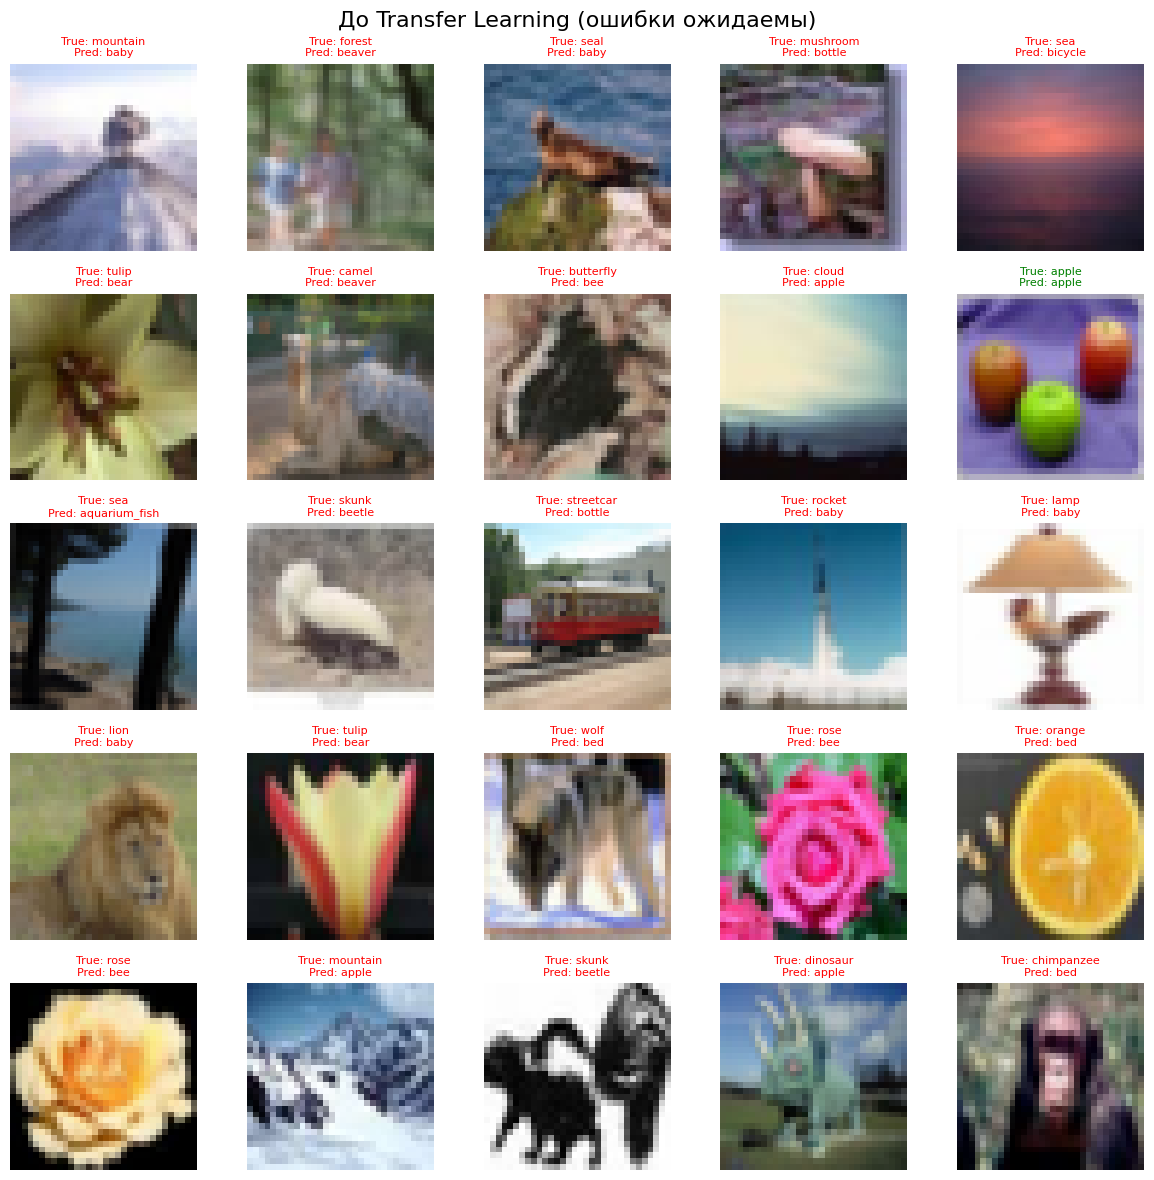

In [38]:
# До Transfer Learning
print("\n Визуализация ДО дообучения (CIFAR-100 через модель с 10 классами)")
# Чтобы сравнение было корректным — используем модель ДО подмены слоя
model_before = CNN(num_classes=10).to(device)
model_before.load_state_dict(torch.load("model_cifar10.pth"))  # если сохраняли
visualize_predictions(model_before, testloader100, "До Transfer Learning (ошибки ожидаемы)")

Визуализация ПОСЛЕ Transfer Learning (модель под 100 классов)


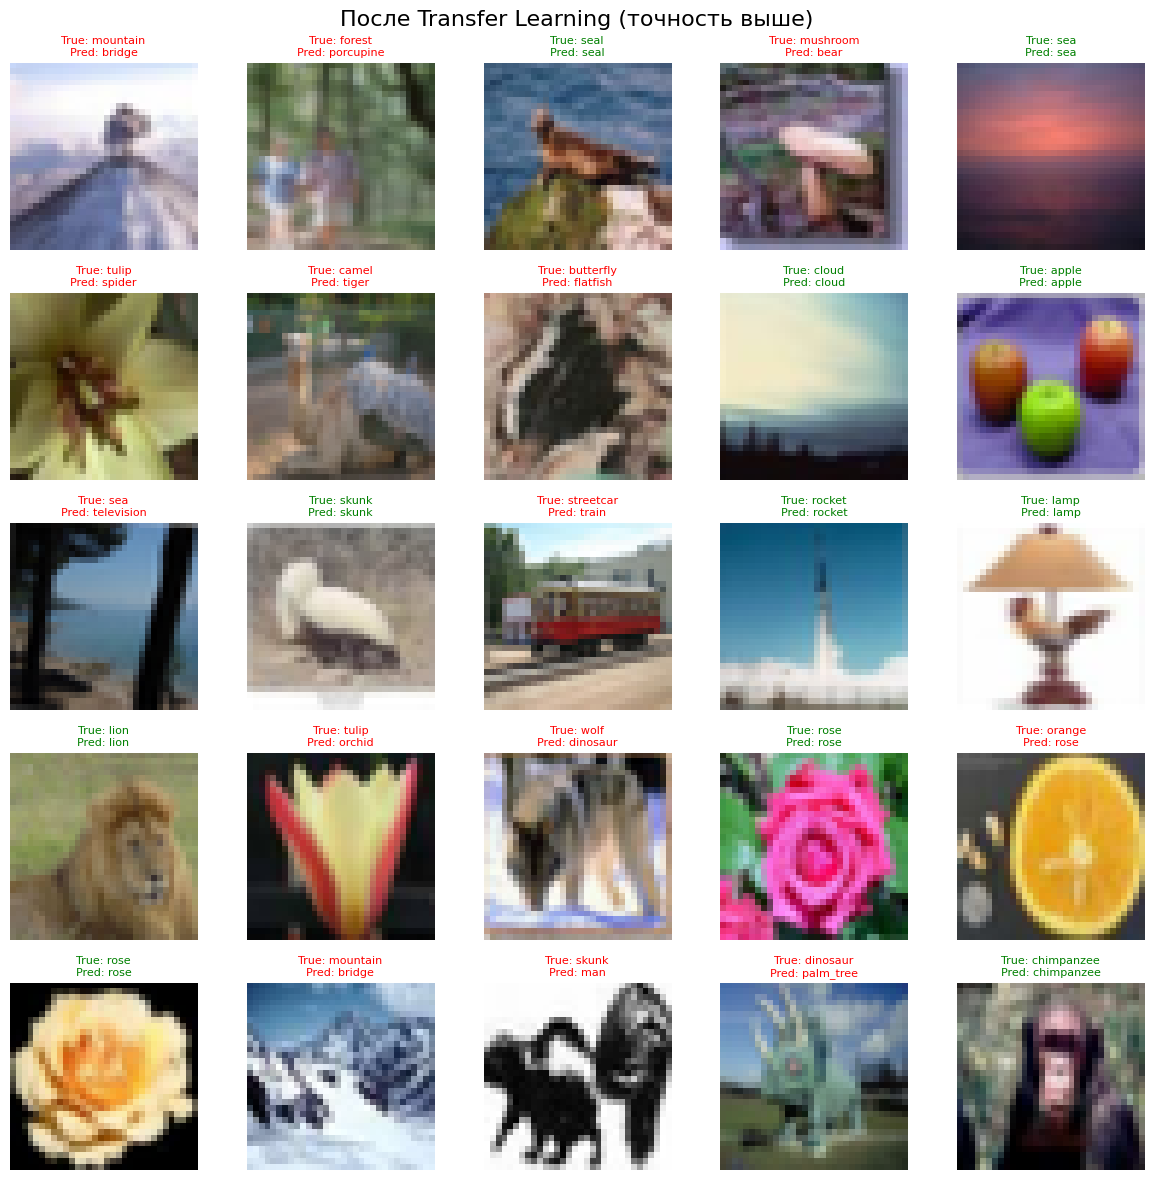

In [37]:
# После Transfer Learning
print("Визуализация ПОСЛЕ Transfer Learning (модель под 100 классов)")
visualize_predictions(model, testloader100, "После Transfer Learning (точность выше)")